number of errors:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
number of errors with h:  [220, 336, 447, 555, 1097, 2287, 5575, 19836, 84625, 562307]
final number of errors:  [220, 336, 447, 555, 1097, 2287, 5575, 19836, 84625, 562307]
number of iterations:  [1730, 3280, 4620, 7009, 17162, 42285, 129467, 556666, 2933977, 24152605]
bit error rate:  [0.057803468208092484, 0.03048780487804878, 0.021645021645021644, 0.014267370523612499, 0.00582682671017364, 0.0023649048125812936, 0.0007723975993882611, 0.000179640933701717, 3.408343010187196e-05, 4.140340141363634e-06]


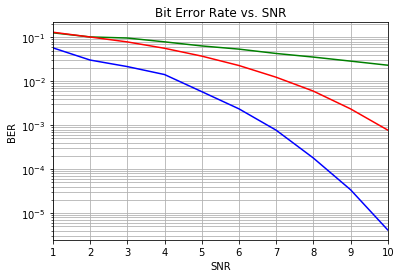

In [63]:
# week 1 code
import matplotlib.pyplot as plt
from math import sqrt
import random
from cmath import phase, exp

sigma = []
for i in range(1,11):
    sigma.append(1 / sqrt((10**(i/10))))                    # populates sigma with the appropriate values

num_errors = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_errors_h = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_errors_final = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
iterations = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):                                      # this loop allows us to cycle through sigmas
    while num_errors[i] < 100:        # this loop goes until too many errors
        iterations[i] += 1                                     # keeps track of how many cycles we do
        # assigns x based on u
        u = random.randint(0, 1)                        # creates a random binary number that will act as our signal
        x = 2*u - 1                                     # assigns the value of x

        # adding in h to acct for fading
        h = random.normalvariate(0, sqrt(.5)) + 1j*random.normalvariate(0, sqrt(.5))
        mag_h = abs(h)
        phase_h = phase(h)

        #z = random.gauss(0, sigma[i-1])                     # creates noise based on the sigma value
        z_final = random.normalvariate(0, sigma[i]/sqrt(2)) + 1j*random.normalvariate(0, sigma[i]/sqrt(2))

        y = x + z_final
        y_h = mag_h*x + z_final                                           # simulates the received signal
        y_tilde = exp((-1j)*phase_h) * (h*x) + z_final

        # demodulator compare mag and phase
        if y.real < 0:
            u_estimate = 0
        else:
            u_estimate = 1
        # demod with fading
        if y_h.real < 0:
            u_est_h = 0
        else:
            u_est_h = 1
        # final demod
        if y_tilde.real < 0:
            u_est_final = 0
        else:
            u_est_final = 1

        # checks for error
        if u != u_estimate:
            num_errors[i] += 1  # updates the number of errors
            #print("num errors: ", num_errors)

        if u != u_est_h:
            num_errors_h[i] += 1
            #print("errors h: ", num_errors_h)

        if u != u_est_final:
            num_errors_final[i] += 1
            #print("errors final: ", num_errors_final)

print("number of errors: ", num_errors)
print("number of errors with h: ", num_errors_h)
print("final number of errors: ", num_errors_final)
print("number of iterations: ", iterations)

# plot the results
snr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bit_error_rate = []
bit_error_rate_h = []
ber_final = []
for i in range(10):
    bit_error_rate.append(num_errors[i] / iterations[i])
    bit_error_rate_h.append(num_errors_h[i] / iterations[i])
    ber_final.append(num_errors_final[i] / iterations[i])

print("bit error rate: ", bit_error_rate)
plt.semilogy(snr, bit_error_rate, color='blue')
#plt.semilogy(snr, bit_error_rate_h)
plt.semilogy(snr, ber_final, color='green')

# plotting week 1 using error function results
snr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
error = [.131, .102, .0789, .0565, .0375, .0229, .0124, .00599, .00236, .0007765]
plt.semilogy(snr, error, color='red')

plt.legend(['AWGN', 'Fading python', 'Fading error function'])
plt.title("Bit Error Rate vs. SNR")
plt.xlabel("SNR")
plt.ylabel("BER")
plt.xlim([1, 10])
plt.grid(True, which="both")
plt.show()


In [1]:
# week 2 code - add gray mapping!!
from math import sqrt
from cmath import exp, phase
from random import randint, normalvariate
import matplotlib.pyplot as plt

# calculating values of sigma
sigma = []
for i in range(1,11):
    sigma.append(1 / sqrt((10**(i/10))))       

A = 1 / sqrt(5) #A value for energy to equal 1

#loc_1, 2, 3, 4 are the four symbols
loc_1 = -3*A
loc_2 = -1*A
loc_3 = A
loc_4 = 3*A

# declaring the necessary arrays
num_bit_errors_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_symbol_errors_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_bit_errors_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_symbol_errors_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
iterations = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# start the loop
for i in range(10):
    while num_bit_errors_1[i] < 100000:
        iterations[i] += 1
        #U is RV (0-3)
        u = randint(0,3)

        # x1-natural mapping, x2-gray mapping
        if u == 0: 
            x1 = loc_1
            x2 = loc_1
        if u == 1: 
            x1 = loc_2
            x2 = loc_2
        if u == 2: 
            x1 = loc_3
            x2 = loc_4
        if u == 3: 
            x1 = loc_4
            x2 = loc_3
    
        # noise effect
        z = normalvariate(0, sigma[i]/sqrt(2)) + 1j*normalvariate(0, sigma[i]/sqrt(2))
        # fading effect
        h = normalvariate(0, sqrt(.5)) + 1j*normalvariate(0, sqrt(.5))
        # received value, y
        y1 = exp((-1j)*phase(h)) * (h*x1) + z
        y2 = exp((-1j)*phase(h)) * (h*x2) + z
                
        # demodulate y1
        if y1.real < -2*A: u_est_1 = 0
        elif -2*A <= y1.real <= 0: u_est_1 = 1
        elif 0 < y1.real <= 2*A: u_est_1 = 2
        elif y1.real > 2*A: u_est_1 = 3
        
        # demodulate y2
        if y2.real < -2*A: u_est_2 = 0
        elif -2*A <= y2.real <= 0: u_est_2 = 1
        elif 0 < y2.real <= 2*A: u_est_2 = 3
        elif y2.real > 2*A: u_est_2 = 2
            
        # check for error in natural mapping
        if u != u_est_1: 
            num_symbol_errors_1[i] += 1
            num_bit_errors_1[i] += 1  # at least one bit will be off
        if u + u_est_1 == 3: num_bit_errors_1[i] += 1  # this determines if there is two bits of error
        
        # check for error in gray mapping
        if u != u_est_2:
            num_symbol_errors_2[i] += 1
            num_bit_errors_2[i] += 1
        if u + u_est_2 == 3: num_bit_errors_2[i] += 1
                
print("symbol errors natural: ", num_symbol_errors_1)
print("bit errors natural: ", num_bit_errors_1)
print("symbol errors gray: ", num_symbol_errors_2)
print("bit errors gray: ", num_bit_errors_2)

# plot the results
snr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bit_error_rate_1 = []
sym_error_rate_1 = []
bit_error_rate_2 = []
sym_error_rate_2 = []
for i in range(10):
    bit_error_rate_1.append(num_bit_errors_1[i] / iterations[i])
    sym_error_rate_1.append(num_symbol_errors_1[i] / iterations[i])
    bit_error_rate_2.append(num_bit_errors_2[i] / iterations[i])
    sym_error_rate_2.append(num_symbol_errors_2[i] / iterations[i])
    
#print("bit error rate: ", bit_error_rate)
plt.semilogy(snr, bit_error_rate_1, color='blue')
plt.semilogy(snr, sym_error_rate_1, color='blue', linestyle='--')
plt.semilogy(snr, bit_error_rate_2, color='red')
plt.semilogy(snr, sym_error_rate_2, color='red', linestyle='--')
plt.legend(['Natural Map bit','Natural Map symbol', 'Gray Map bit','Gray Map symbol'])
plt.title("Bit Error Rate vs. SNR")
plt.xlabel("SNR")
plt.ylabel("BER")
plt.xlim([1, 10])
plt.grid(True, which="both")
plt.show()


symbol errors natural:  [77470, 77488, 77647, 78000, 78716, 79370, 80545, 81843, 83279, 84844]
bit errors natural:  [100000, 100001, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
symbol errors gray:  [77691, 77485, 77560, 77699, 78708, 79331, 80953, 81545, 83512, 84736]
bit errors gray:  [86628, 85166, 83931, 83040, 83208, 83272, 84358, 84458, 86171, 87008]


<Figure size 640x480 with 1 Axes>

In [61]:
# gray mapping is better than natural mapping. Why?
# with natural mapping there is a 2 bit difference in the middle (01, 10) if we change it to (01, 11) in the middle
# then even if there is a symbol error made there will only be one bit error.
# Gray mapping reduces bit error.

In [2]:
# IST implementation
import numpy as np

def ist(y_vec, a_mat, s, lamb):
    # y_vec is the recieved message
    # a_mat is the sensing matrix
    # s, lamb combine to be the parameter for the soft thresholding func
    # returns a guess for the original message, x
    
    y_work = y_vec.copy() # copy y to work with without changing original
    x_length = a_mat.shape[1]  # x_length is the second dimension of A
    # make initial guess for x (all zeroes)
    x = [0 for d in range(x_length)]
    
    x_new = x #initializes the value to be used later
    t = 0 # number of iterations
    
    #iterative process- what should be paramter for while loop?
    while(t < 100):
        t += 1
        x = x_new
        z = y_work - np.matmul(a_mat, x) # calculates residual error
    
        # update the guess of x
        send_eta = x + s*np.matmul((a_mat.transpose()), z)
        x_new = eta(send_eta, s*lamb)
    
    return x # returns the found value of x

def eta(u, T):
    i = 0 
    for element in u:
        if element >= T: u[i] = element - T
        elif element <= -1*T: u[i] = element + T
        else: u[i] = 0
        i += 1
  

#1 generate k-sparse of length N
N = 1000
# intially all non-zero elements will be 1
#takes the first 40 elements in a permutation of numbers 0-999
non_zero_indicies = np.random.permutation(N)[0:40]
x = np.zeros(N) #initially make x all zero
for elm in non_zero_indices:
    x[elm] = 1  #can change this to be more complex

#2 NOT DONE- determine what it wants you to do
for n in range(225, 501, 25):
    A = np.random.randn(n, N)
    
#3 200 iterations of ist



NameError: name 'non_zero_indices' is not defined

In [ ]:
#AMP implementation
def amp(y_vec, a_mat, tau):
    #returns original message, x
    #y_vec is recevied signal
    #a_mat is sensing matrix
    #tau is the thresholding parameter
    
    y_work = y_vec.copy() # copy y to work with without changing original
    x_length = a_mat.shape[1]  # x_length is the second dimension of A
    # make initial guess for x (all zeroes)
    x = [0 for d in range(x_length)]
    
    x_new = x #initializes the value to be used later
    t = 0 # number of iterations
    mu = 0 # initial onsager value
    
    #what should be the parameter?
    while(t < 100):
        t += 1
        x = x_new
        
        z = y - 
        
        #onsager caluclated at end bc it needs to use previous iteration values
        mu = onsager(z, a_mat, r_vec, tau)
        
def onsager(z, a, r, tau):
    #returns onsager term
    temp = z/(a_mat.shape[0]) #will be multplied by sum of eta
    total = 0
    
    for j in range(1, 1001): #assuming N = 1000
        total += eta(r_vec, tau)
        
    return temp*total
    
def eta(u, T):
    i = 0 
    for element in u:
        if element >= T: u[i] = element - T
        elif element <= -1*T: u[i] = element + T
        else: u[i] = 0
        i += 1
    